In [1]:
# filter

In [2]:
import pandas, numpy

In [3]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':30, 
                            'ytick.labelsize':30, 
                            'figure.figsize':(16, 9), 
                            'axes.labelsize':40, 
                            'svg.fonttype':'none'})


# user-defined variables

In [15]:
data_folder = '/Users/adrian/research/akureyri/results/deseq2_pipeline/'
expression_file = '/Users/adrian/research/akureyri/results/deseq2_pipeline/DESeq2_TPM_values.tsv'
metadata_file = '/Users/adrian/research/akureyri/results/deseq2_pipeline/metadata.tsv'

# read info

In [28]:
tpm = pandas.read_csv(expression_file, sep='\t', index_col=0)
tpm.head()

,test01,test02,test03,test04,test05,test06,test07,test08,test09,test10,test11,test12
ENSG00000000003,12.480951,14.500356,12.973101,13.639502,13.056435,15.536032,13.025809,11.380208,14.604471,16.337347,14.475374,13.477217
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,120.981242,107.924893,120.233355,105.070478,117.550878,101.073762,123.991231,93.626046,123.207637,97.723357,93.615215,112.974659
ENSG00000000457,3.624791,5.523426,3.872989,3.323551,2.324639,5.041956,4.175279,4.372463,4.307249,5.125585,4.414247,4.047019
ENSG00000000460,15.407117,10.366913,12.076084,17.697199,11.087450,8.450714,11.056973,21.588369,17.890017,9.149726,18.332927,18.389641


In [16]:
metadata = pandas.read_csv(metadata_file, sep='\t')
metadata.head()

,sample,label,time,culture,path
1,test01,RNA_test_1_EKRN230071387-1A,two,2D,/Users/adrian/research/akureyri/results/kallis...
3,test02,RNA_test_2_EKRN230071388-1A,two,3D,/Users/adrian/research/akureyri/results/kallis...
5,test03,RNA_test_3_EKRN230071389-1A,fourteen,2D,/Users/adrian/research/akureyri/results/kallis...
7,test04,RNA_test_4_EKRN230071390-1A,fourteen,3D,/Users/adrian/research/akureyri/results/kallis...
9,test05,RNA_test_5_EKRN230071391-1A,two,2D,/Users/adrian/research/akureyri/results/kallis...
10,test06,RNA_test_6_EKRN230071392-1A,two,3D,/Users/adrian/research/akureyri/results/kallis...
11,test07,RNA_test_7_EKRN230071393-1A,fourteen,2D,/Users/adrian/research/akureyri/results/kallis...
12,test08,RNA_test_8_EKRN230071394-1A,fourteen,3D,/Users/adrian/research/akureyri/results/kallis...
2,test09,RNA_test_1_EKRN240003675-1A,two,2D,/Users/adrian/research/akureyri/results/kallis...
4,test10,RNA_test_2_EKRN240003676-1A,two,3D,/Users/adrian/research/akureyri/results/kallis...


# contrast A: effect of time on 2D cultures

In [5]:
input_file = data_folder + 'effect_time_2D.tsv'
df = pandas.read_csv(input_file, sep='\t')
df.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000001630,1618.261097,-1.374572,0.358075,14.224734,1.622242e-04,7.967120e-03
ENSG00000004399,1357.951804,-1.023238,0.296851,11.653545,6.408030e-04,2.279408e-02
ENSG00000005379,145.506076,2.326498,0.511577,18.968687,1.328814e-05,1.102102e-03
ENSG00000012171,1044.301020,1.529732,0.445552,11.282379,7.824623e-04,2.617224e-02
ENSG00000013016,1997.803434,1.504968,0.163086,81.894884,1.435203e-19,1.166533e-15


In [31]:
sub = metadata[metadata['culture'] == '2D']
labels = sub['sample']
subset_tpm = tpm[labels]

print(labels)
print(sub)
subset_tpm.head()

1     test01
5     test03
9     test05
11    test07
2     test09
6     test11
Name: sample, dtype: object
    sample                        label      time culture  \
1   test01  RNA_test_1_EKRN230071387-1A       two      2D   
5   test03  RNA_test_3_EKRN230071389-1A  fourteen      2D   
9   test05  RNA_test_5_EKRN230071391-1A       two      2D   
11  test07  RNA_test_7_EKRN230071393-1A  fourteen      2D   
2   test09  RNA_test_1_EKRN240003675-1A       two      2D   
6   test11  RNA_test_3_EKRN240003677-1A  fourteen      2D   

                                                 path  
1   /Users/adrian/research/akureyri/results/kallis...  
5   /Users/adrian/research/akureyri/results/kallis...  
9   /Users/adrian/research/akureyri/results/kallis...  
11  /Users/adrian/research/akureyri/results/kallis...  
2   /Users/adrian/research/akureyri/results/kallis...  
6   /Users/adrian/research/akureyri/results/kallis...  


,test01,test03,test05,test07,test09,test11
ENSG00000000003,12.480951,12.973101,13.056435,13.025809,14.604471,14.475374
ENSG00000000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ENSG00000000419,120.981242,120.233355,117.550878,123.991231,123.207637,93.615215
ENSG00000000457,3.624791,3.872989,2.324639,4.175279,4.307249,4.414247
ENSG00000000460,15.407117,12.076084,11.087450,11.056973,17.890017,18.332927


In [ ]:
generate z for max expression of medians.


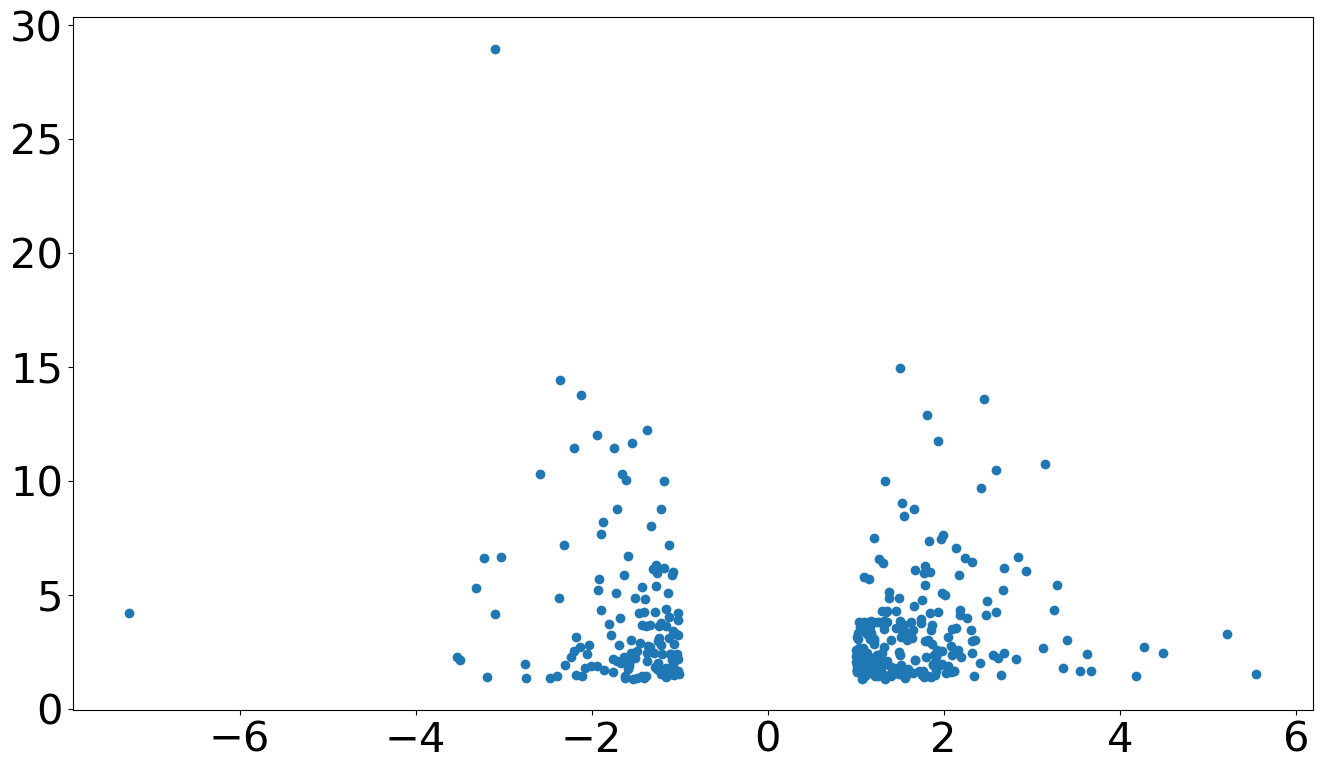

In [6]:
x = df['log2FoldChange']
y = -numpy.log10(df['padj'])
matplotlib.pyplot.plot(x, y, 'o')

In [7]:
-numpy.log10(df['padj'])

ENSG00000001630     2.098699
ENSG00000004399     1.642178
ENSG00000005379     2.957778
ENSG00000012171     1.582159
ENSG00000013016    14.933103
                     ...    
ENSG00000289423     2.192467
ENSG00000290554     2.244652
ENSG00000291049     1.912277
ENSG00000291110    14.409598
ENSG00000291288     6.018272
Name: padj, Length: 372, dtype: float64

In [8]:
# generate volcanos
# generate heatmap
# generate venn diagram

In [9]:
# add annotation